In [1]:
#imports 
import pandas as pd 
import os
import matplotlib.pyplot as plt


In [2]:
#count the number of images in each sub folder 

def count_images_in_subfolders(parent_folder_path):
    def count_images(folder_path):
        num_images = 0
        for root, dirs, files in os.walk(folder_path):
            for filename in files:
                if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                    num_images += 1
        return num_images

    subfolders = [f.path for f in os.scandir(parent_folder_path) if f.is_dir()]
    result = {}
    for folder_path in subfolders:
        folder_name = os.path.basename(folder_path)
        #taking the _val or _test out of the name so we can add together 
        folder_name = folder_name.split('_')[0]
        num_images = count_images(folder_path)
        result[folder_name] = num_images

    return result

In [3]:
#count images in each of these folders 
train = count_images_in_subfolders('../images/train/')
val =count_images_in_subfolders('../images/val/')
test = count_images_in_subfolders('../images/test/')


In [4]:
#add everything together 
def add_image_counts(image_counts_list):
    total_images = {}
    for image_counts in image_counts_list:
        for folder, count in image_counts.items():
            total_images[folder] = total_images.get(folder, 0) + count
    return total_images

In [5]:
#running the function to add everything together 
total_images = add_image_counts([train, val, test])

In [6]:
#turning it indo a df to make it easy to plot 
df = pd.DataFrame(list(total_images.items()), columns=['emotion', 'number_of_images'])

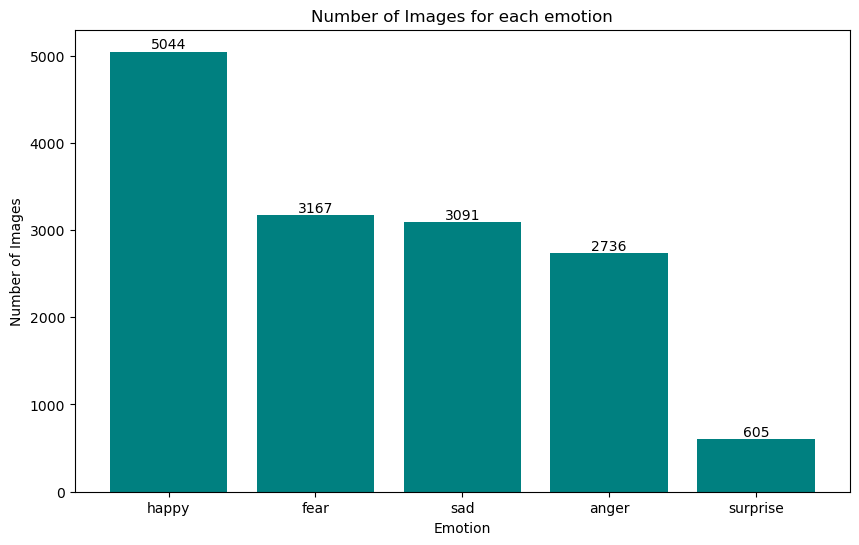

In [7]:
#plot the graph 
df = df.sort_values(by='number_of_images', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df['emotion'], df['number_of_images'], color='teal')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Number of Images for each emotion')
for index, value in enumerate(df['number_of_images']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
plt.savefig('../graphs/emotion_images.png')
plt.show()